# Yolo

YOLO is an acronym for “You Only Look Once” (don’t confuse it with You Only Live Once from The Simpsons). As the name suggests, a single “look” is enough to find all objects on an image and identify them.

In machine learning terms, we can say that all objects are detected via a single algorithm run. It’s done b

In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\Mahmoud/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-14 Python-3.11.5 torch-2.5.1+cpu CPU

100%|██████████| 14.1M/14.1M [00:08<00:00, 1.66MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
image_path = "people.jpg"
img = cv2.imread(image_path)


In [4]:
results = model(img)

C:\Users\Mahmoud/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [5]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 953x1300 21 persons, 1 car, 1 truck, 1 traffic light, 7 handbags
Speed: 10.0ms pre-process, 89.2ms inference, 14.3ms NMS per image at shape (1, 3, 480, 640)

In [6]:
detections = results.pandas().xyxy[0]
detections.head()

,xmin,ymin,xmax,ymax,confidence,class,name
0,111.067978,563.347107,198.424591,785.873779,0.894789,0,person
1,1185.860718,491.935669,1299.059692,618.289307,0.883984,2,car
2,1084.680054,553.506287,1162.971191,782.821899,0.853173,0,person
3,939.891785,552.418762,1019.506470,766.429565,0.787545,0,person
4,1150.679321,572.200745,1206.992920,774.979858,0.762905,0,person


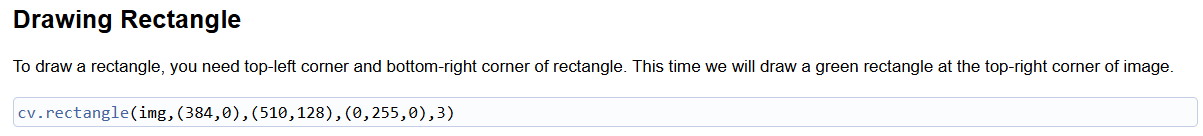

In [7]:
# Draw bounding boxes and labels on the image
for _, row in detections.iterrows():
    x1, y1, x2, y2, conf, cls = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax']), row['confidence'], row['name']
    
    if conf > 0.7:
        label = f"{cls} {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Save the result image
output_path = 'output.jpg'
cv2.imwrite(output_path, img)
print(f"Output saved to {output_path}")


Output saved to output.jpg


In [8]:



# Function to perform object detection
def detect_objects(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Perform inference
    results = model(img)

    # Parse results
    detections = results.pandas().xyxy[0]

    # Draw bounding boxes and labels on the image
    for _, row in detections.iterrows():
        x1, y1, x2, y2, conf, cls = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax']), row['confidence'], row['name']
        label = f"{cls} {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the result image
    output_path = 'output.jpg'
    cv2.imwrite(output_path, img)
    print(f"Output saved to {output_path}")

# Example usage
# image_path = 'example_03.jpg'  # Path to the input image
detect_objects(image_path)


Output saved to output.jpg


C:\Users\Mahmoud/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


# Key frames selection/detection
Key frame selection or detection is a process used in video processing and computer vision to identify and retain frames that contain significant or critical information from a sequence of frames.
key frames serve as representative snapshots of the video content, capturing essential moments or changes in the scene.

In [9]:
import cv2
import os

In [10]:
output_folder = "output_folder"

In [11]:
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [12]:
video_path = "test2.mp4"
# Open the video file
cap = cv2.VideoCapture(video_path)

In [13]:
# while cap.isOpened():
#         ret, frame = cap.read()
#         print(frame)
# cap.release()

In [14]:


def save_key_frames(video_path, output_folder, interval=30):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    saved_frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Save every 'interval' frame as a key frame
        if frame_count % interval == 0:
            frame_filename = os.path.join(output_folder, f"key_frame_{saved_frame_count}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved_frame_count += 1

        frame_count += 1

    cap.release()
    print(f"Saved {saved_frame_count} key frames to {output_folder}")

# Example usage
video_path = 'test2.mp4'  # Path to the input video file
output_folder = 'key_frames'   # Folder to save the key frames
interval = 30                  # Save one frame every 30 frames

save_key_frames(video_path, output_folder, interval)


Saved 7 key frames to key_frames


# 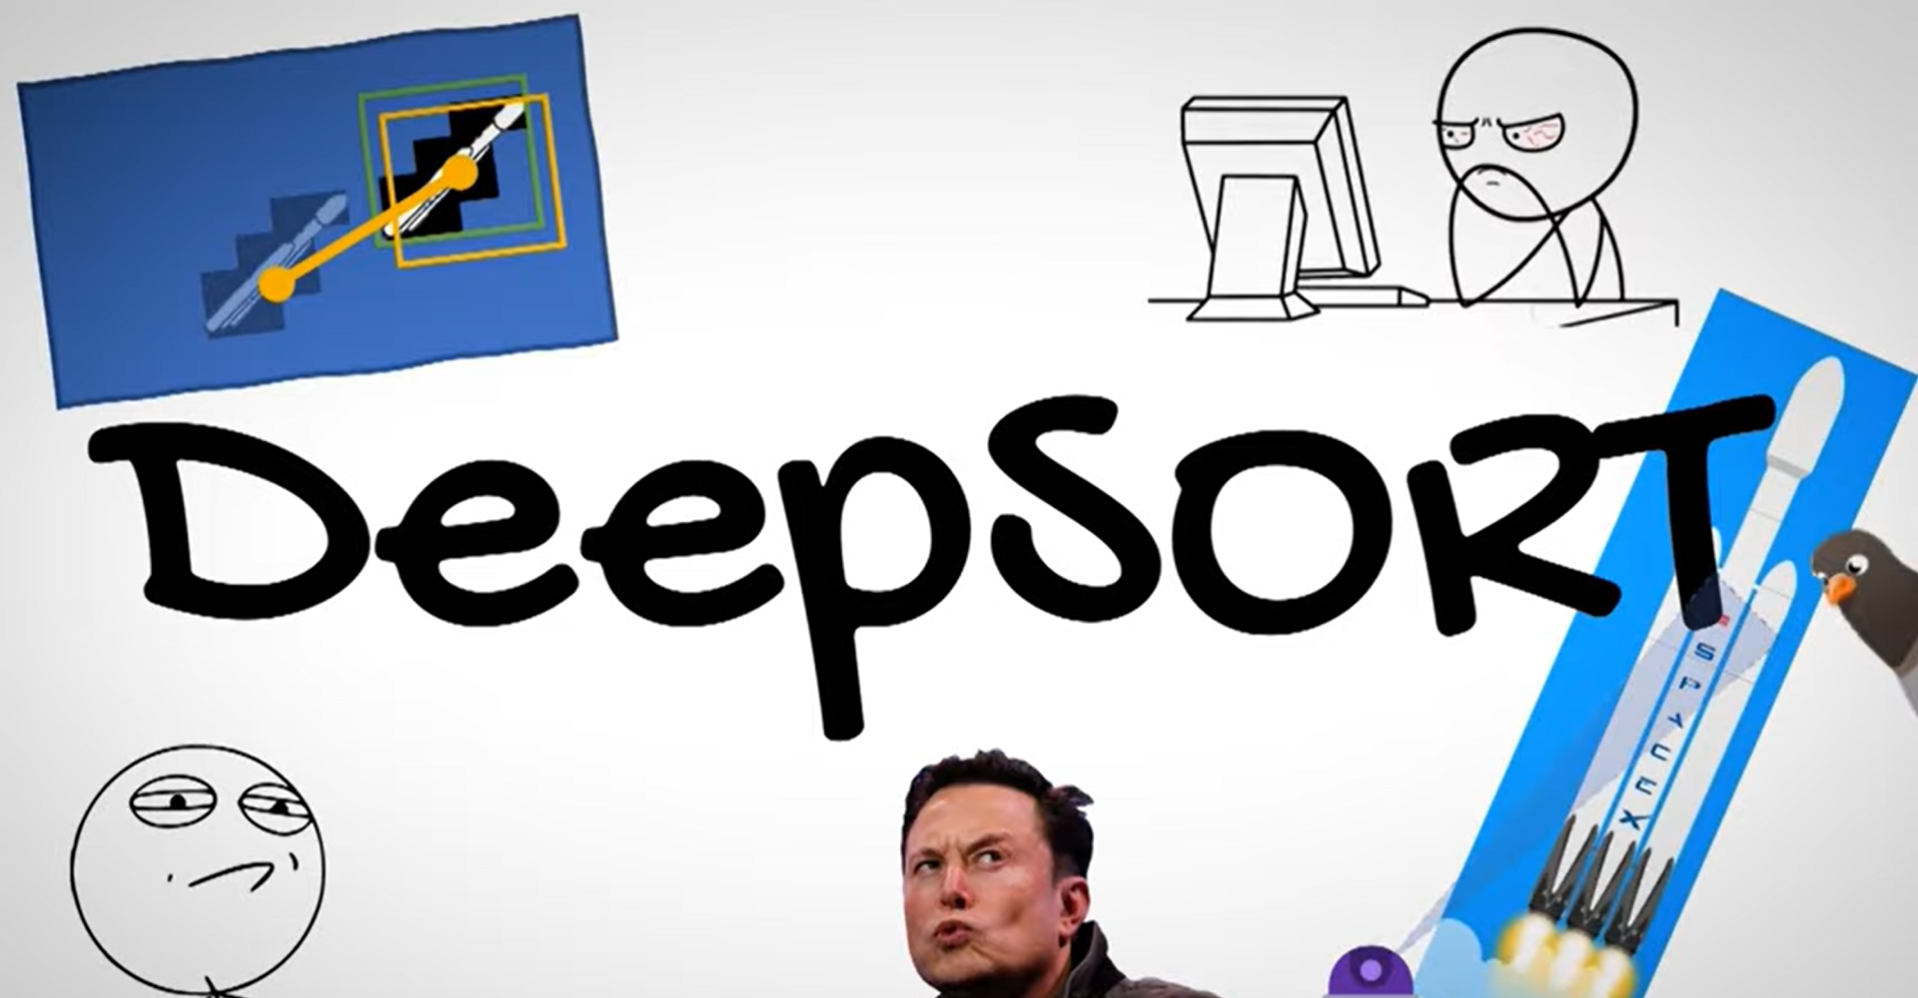

In [15]:
!pip install ultralytics
# !pip install opencv-python-headless
!pip install deep_sort_realtime

: 

In [ ]:
from ultralytics import YOLO  # Import YOLOv8 from Ultralytics
from deep_sort_realtime.deepsort_tracker import DeepSort  # Import DeepSORT
import cv2

# Initialize YOLOv8 model
yolo_model = YOLO("yolov8n.pt")  # Use a YOLOv8 model (e.g., 'yolov8n.pt' for Nano model)

# Initialize DeepSORT tracker
tracker = DeepSort(max_age=30, n_init=3, nn_budget=100)  # Configure DeepSORT

# Open video capture
input_video_path = "walking .mp4"
output_video_path = "output_video.avi"

cap = cv2.VideoCapture(input_video_path)

# Get video properties for saving
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Define codec (e.g., 'XVID' for .avi)
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# max_frames = 100  # Only process first 100 frames
frame_index = 0
while  cap.isOpened():
    ret, frame = cap.read()
    frame_index += 1
    if not ret:
        break

    # Step 1: Run YOLOv8 to detect objects
    results = yolo_model.predict(frame, stream=True)  # Perform prediction with streaming

    # Step 2: Extract bounding boxes, confidence scores, and class IDs
    bbox_xywh = []
    confidences = []
    class_ids = []

    for result in results:
        
        if results and len(result.boxes.xyxy) > 0:
            # Each result contains bbox, conf, cls
            x1, y1, x2, y2 = result.boxes.xyxy[0].tolist()
            conf = result.boxes.conf[0].item()
            cls = int(result.boxes.cls[0].item())
            w, h = x2 - x1, y2 - y1
            xc, yc = x1 + w / 2, y1 + h / 2
    
            bbox_xywh.append([xc, yc, w, h])
            confidences.append(conf)
            class_ids.append(cls)

    # Prepare DeepSORT input format
    raw_detections = [
        [bbox, conf, cls]
        for bbox, conf, cls in zip(bbox_xywh, confidences, class_ids)
    ]

    # Step 3: Update DeepSORT tracker
    track_bbs_ids = tracker.update_tracks(raw_detections, frame=frame)

    # Step 4: Draw tracking results on the frame
    for track in track_bbs_ids:
        bbox = track.to_tlbr()  # Convert to (top-left, bottom-right) format
        track_id = track.track_id  # Get track ID

        # Draw bounding box and ID
        x1, y1, x2, y2 = map(int, bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            frame,
            f"ID: {track_id}",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 0, 0),
            2,
        )

    # Write the processed frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()



0: 384x640 1 person, 63.6ms
Speed: 3.0ms preprocess, 63.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 46.1ms
Speed: 1.5ms preprocess, 46.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
